**Tareas pendientes**
- Cambiar tamaño de los ejes, títulos, la paleta de colores de los gráficos
- En la matriz de correlación poner la variable categórica
- Preguntar sobre el score óptimo
- Preguntar sobre el sobremuestreo
- Preguntar sobre los valores aleatorios
- Preguntar sobre la curva roc

#**Conectarse a Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import matplotlib.colors
import matplotlib.patches as patches

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc,
                             ConfusionMatrixDisplay, f1_score, precision_recall_curve, recall_score, precision_score)
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

#**Base de datos**

##Lectura de base de datos

La columna **fetal_health** tiene como etiquetas 1-Normal, 2-Sospechoso y 3-Patológico.

In [3]:
# Lectura de la base de datos

base = pd.read_csv('/content/drive/MyDrive/Proyecto de Consultoria/fetal_health.csv')
print('La base de datos tiene', base.shape[0], 'filas y', base.shape[1], 'columnas')
base.reset_index()
base.head()

La base de datos tiene 2126 filas y 22 columnas


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
# Nombre de las columnas

base.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
# Cambio de nombre a las columnas

base.columns = ['baseline_value', 'accelerations', 'fetal_movement',
                'uterine_contractions', 'light_decelerations', 'severe_decelerations',
                'prolongued_decelerations', 'abnormal_short_tv',
                'mean_value_of_short_tv',
                'percentage_of_time_waltv',
                'mean_value_of_long_tv', 'histogram_width',
                'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
                'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
                'histogram_median', 'histogram_variance', 'histogram_tendency',
                'fetal_health']

aux = base.copy()
base_MRD = base.copy()

In [6]:
# Conversión de la columna fetal_health a categoríca

base['fetal_health'] = base['fetal_health'].astype('category')

In [7]:
# Comprobar si hay valores nulos e información de las columnas

# Verifica si hay nulos en la base
#base.isnull().any()

# Suma la cantidad de nulos que hay en la base
base.isnull().sum()

baseline_value                0
accelerations                 0
fetal_movement                0
uterine_contractions          0
light_decelerations           0
severe_decelerations          0
prolongued_decelerations      0
abnormal_short_tv             0
mean_value_of_short_tv        0
percentage_of_time_waltv      0
mean_value_of_long_tv         0
histogram_width               0
histogram_min                 0
histogram_max                 0
histogram_number_of_peaks     0
histogram_number_of_zeroes    0
histogram_mode                0
histogram_mean                0
histogram_median              0
histogram_variance            0
histogram_tendency            0
fetal_health                  0
dtype: int64

In [8]:
# Información de la base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   baseline_value              2126 non-null   float64 
 1   accelerations               2126 non-null   float64 
 2   fetal_movement              2126 non-null   float64 
 3   uterine_contractions        2126 non-null   float64 
 4   light_decelerations         2126 non-null   float64 
 5   severe_decelerations        2126 non-null   float64 
 6   prolongued_decelerations    2126 non-null   float64 
 7   abnormal_short_tv           2126 non-null   float64 
 8   mean_value_of_short_tv      2126 non-null   float64 
 9   percentage_of_time_waltv    2126 non-null   float64 
 10  mean_value_of_long_tv       2126 non-null   float64 
 11  histogram_width             2126 non-null   float64 
 12  histogram_min               2126 non-null   float64 
 13  histogram_max     

#Análisis exploratorio

##Histograma de las variables

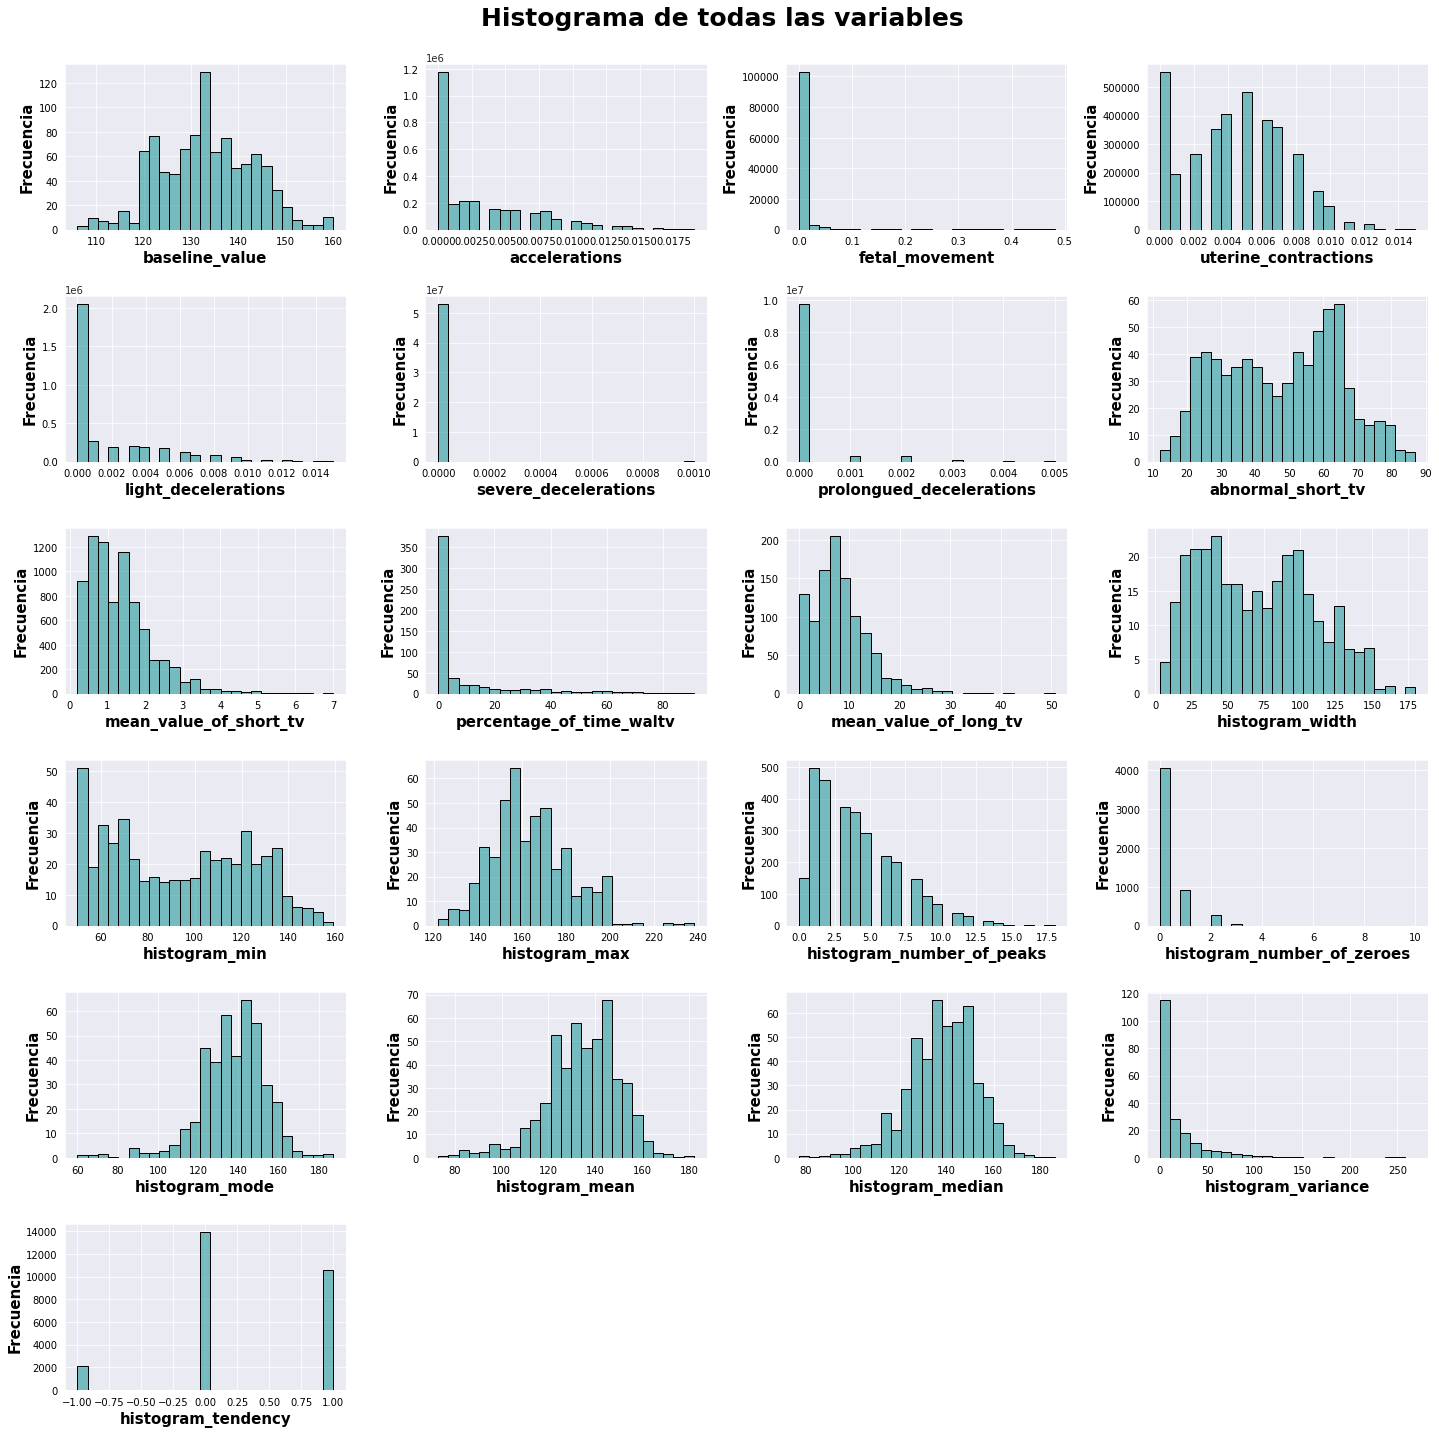

In [9]:
# Realiza un histograma de cada una de las variables

sns.set_style('darkgrid')
sns.color_palette('husl', 9)

plt.figure(figsize = (20, 20))

for i in range(base.shape[1]-1):
  plt.subplot(6, 4, i + 1)
  plt.tight_layout(h_pad = 2)
  sns.histplot(data = base.iloc[:, i], color = 'darkcyan', edgecolor = 'black', stat = 'frequency', bins = 25,
               alpha = 0.5)
  #plt.title(base.columns[i], fontweight = 'bold', fontsize = 18, color = 'black')
  plt.suptitle('Histograma de todas las variables', fontweight = 'bold', fontsize = 25, color = 'black')
  plt.xlabel(base.columns[i], fontweight = 'bold', fontsize = 15, color = 'black')
  plt.xticks(color = 'black')
  plt.ylabel('Frecuencia', fontweight = 'bold', fontsize = 15, color = 'black')
  plt.yticks(color = 'black')
  plt.subplots_adjust(top = 0.94)

##Densidad de las variables

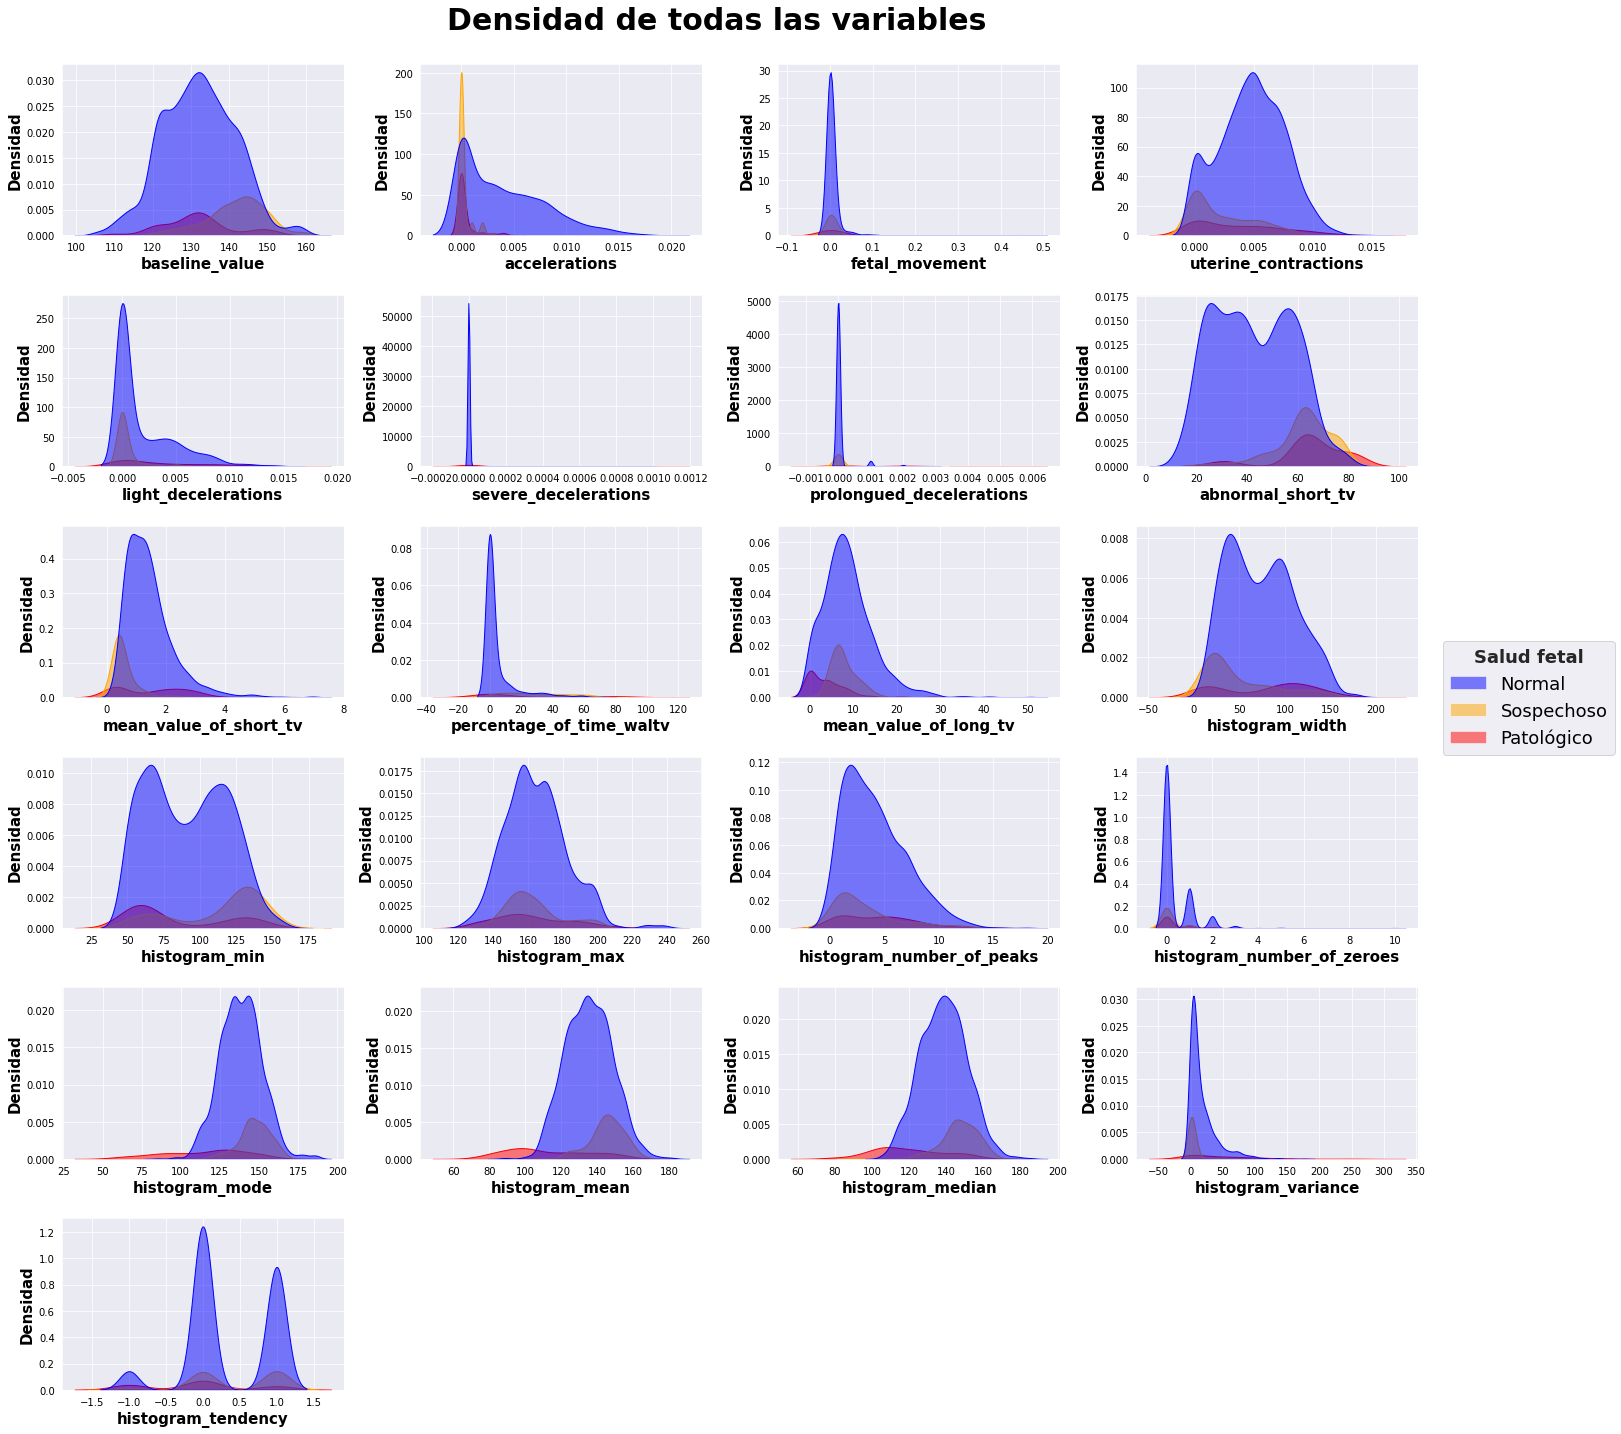

In [10]:
# Realiza la densidad de cada una de las variables

plt.figure(figsize = (20, 20))
colores = {1: 'blue', 2: 'orange', 3: 'red'}

for i in range(base.shape[1]-1):
  plt.subplot(6, 4, i + 1)
  plt.tight_layout(h_pad = 2)
  sns.kdeplot(data = base, x = base.iloc[:, i], hue = 'fetal_health', fill = True,
              alpha = 0.5, warn_singular = False, legend = False, palette = colores)
  plt.suptitle('Densidad de todas las variables', fontweight = 'bold', fontsize = 30, color = 'black')
  plt.subplots_adjust(top = 0.94)
  plt.xlabel(base.columns[i], fontweight = 'bold', fontsize = 15, color = 'black')
  plt.xticks(color = 'black')
  plt.ylabel('Densidad', fontweight = 'bold', fontsize = 15, color = 'black')
  plt.yticks(color = 'black')

handles = [patches.Patch(facecolor = colores[label], alpha = 0.5) for label in [1, 2, 3]]
leyenda = plt.figlegend(handles = handles, labels = ['Normal', 'Sospechoso', 'Patológico'], loc = 'center right',
                        ncol = 1, bbox_to_anchor = (1.13, 0.5), title = 'Salud fetal',
                        title_fontproperties = {'weight': 'bold', 'size': 18}, prop = {'size': 18})

for texto in leyenda.texts:
    texto.set_color('black')



##Diagrama de caja de las variables

Verificar si hace falta estandarizar

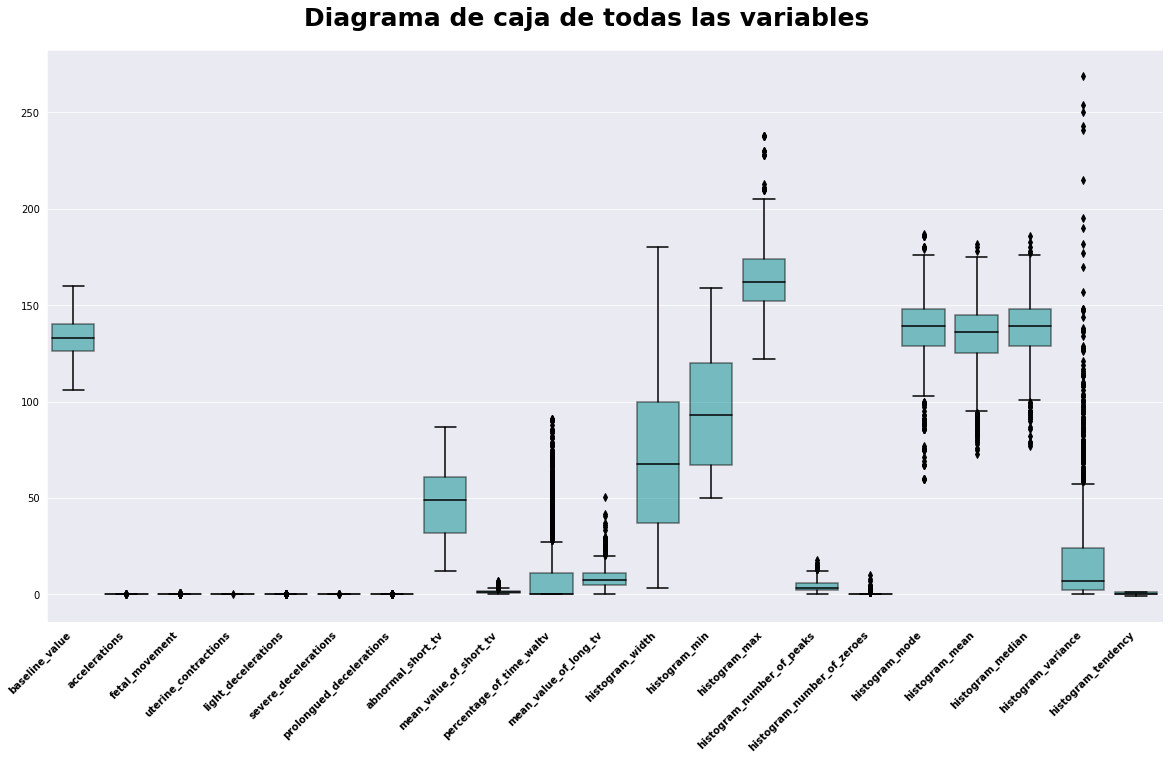

In [11]:
# Realiza un digrama de caja de todas las variables

PROPS = {
    'boxprops':{'facecolor': 'darkcyan', 'edgecolor': 'black', 'alpha': 0.5},
    'medianprops':{'color': 'black'},
    'whiskerprops':{'color': 'black'},
    'capprops':{'color': 'black'}
}

outliers = {
    #'marker': 'o',
    'markeredgecolor': 'black',
    'markerfacecolor': 'black'
}

plt.figure(figsize = (20, 10))
sns.boxplot(data = base, color = 'darkcyan', flierprops = outliers, **PROPS)
plt.xticks(rotation = 45, ha = 'right', color = 'black', fontweight = 'bold')
plt.suptitle('Diagrama de caja de todas las variables', fontweight = 'bold', fontsize = 25, color = 'black')
plt.yticks(color = 'black')
plt.subplots_adjust(top = 0.92)

##Conteo de clases

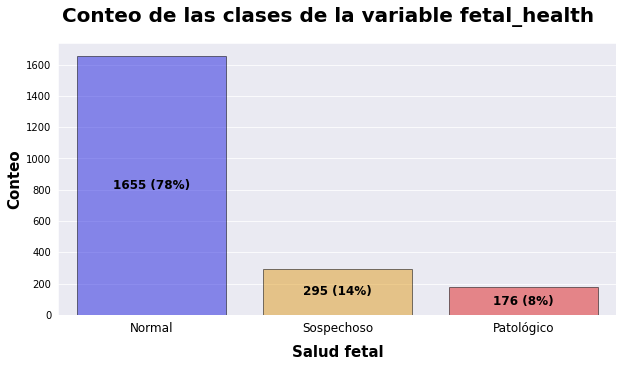

In [12]:
# Realiza un gráfico de conteo de las clases de la variable fetal_health

plt.figure(figsize = (10, 5))
colores = {1: 'blue', 2: 'orange', 3: 'red'}

a = sns.countplot(x = base['fetal_health'],
                  order = base['fetal_health'].value_counts(ascending = False).index, edgecolor = 'black',
                  palette = colores, alpha = 0.5)
valores_absolutos = base['fetal_health'].value_counts(ascending = False)
valores_relativos = base['fetal_health'].value_counts(ascending = False, normalize = True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(valores_absolutos, valores_relativos)]

a.bar_label(container = a.containers[0], labels = lbls, fontweight = 'bold',
            label_type = 'center',
            #padding = 10,
            color = 'black',
            fontsize = 12)
a.set_xticklabels(['Normal', 'Sospechoso', 'Patológico'])

plt.suptitle('Conteo de las clases de la variable fetal_health', fontweight = 'bold', fontsize = 20, color = 'black')
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black')
plt.xlabel('Salud fetal', fontweight = 'bold', fontsize = 15, color = 'black', labelpad = 10)
plt.ylabel('Conteo', fontweight = 'bold', fontsize = 15, color = 'black')
plt.subplots_adjust(top = 0.88)

In [13]:
# Conteo de las clases de la variable fetal_health (1-Normal, 2-Sospechoso y 3-Patológico.)

base['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

##Gráfico de dispersión

<Figure size 1440x1440 with 0 Axes>

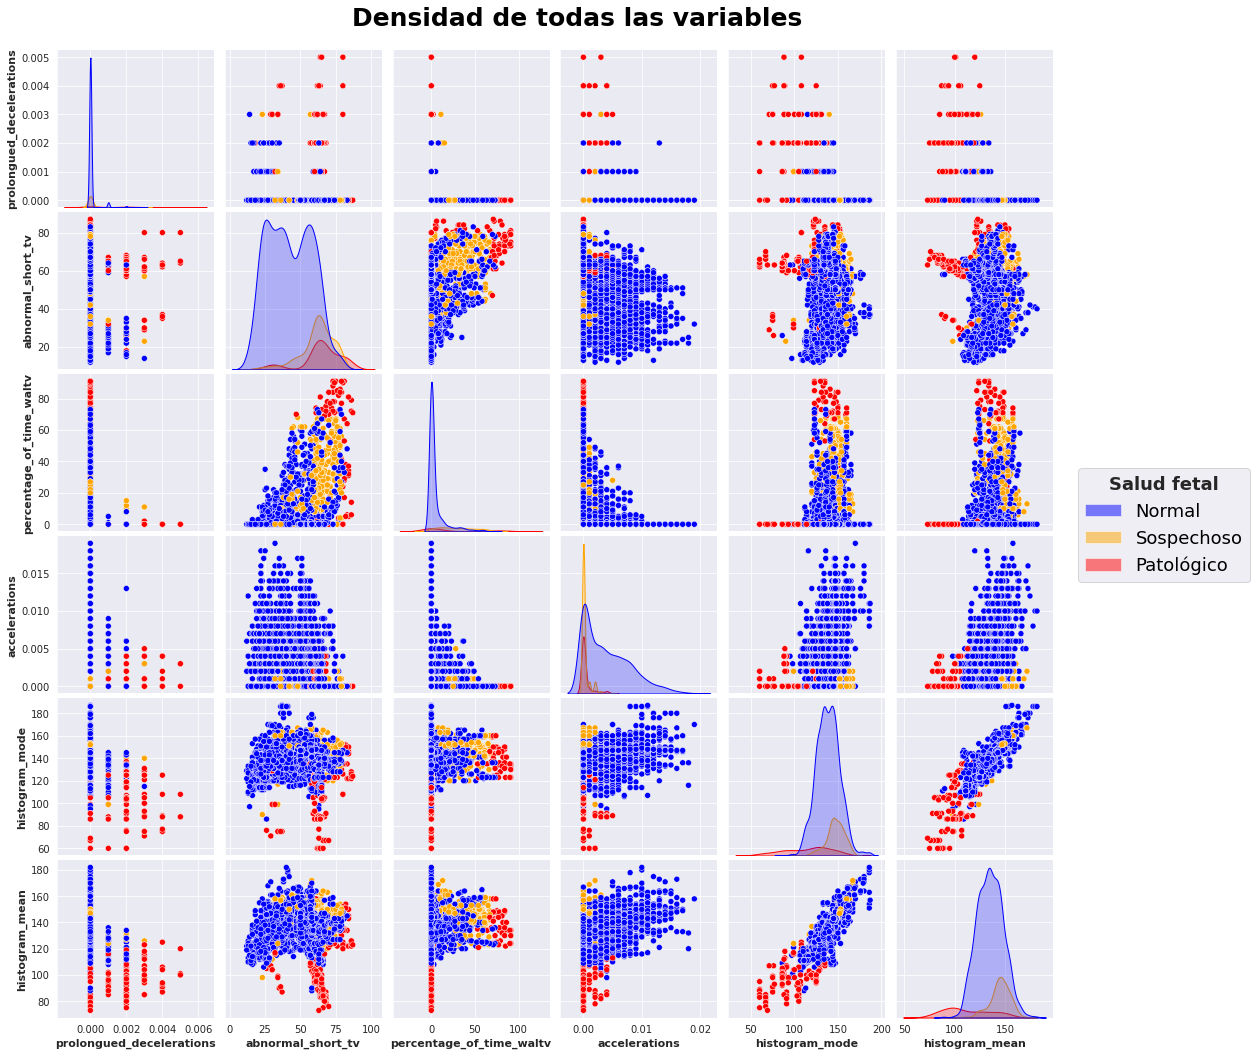

In [14]:
# Realiza un gráfico de dispersión

clases = {1: 'Normal', 2: 'Sospechoso', 3: 'Patológico'}
clases_inverso = {'Normal': 1, 'Sospechoso': 2, 'Patológico': 3}
numero_clases = len(clases)

aux.fetal_health.replace(clases_inverso, inplace = True)
correlacion = aux.corr()['fetal_health'][:-1]
indices = correlacion.abs().sort_values(ascending = False).index[:6]
indices = indices.append(pd.Index(['fetal_health']))

aux.fetal_health.astype(object, copy = False)
aux.fetal_health.replace(clases, inplace = True)

plt.figure(figsize = (20, 20))

g = sns.pairplot(aux[indices], hue = 'fetal_health',
                 hue_order = clases.values(),
                 palette = ['blue', 'orange', 'red'])

for ax in g.axes.flat:
  ax.set_xlabel(ax.get_xlabel(), fontweight = 'bold', fontsize = 11)
  ax.set_ylabel(ax.get_ylabel(), fontweight = 'bold', fontsize = 11)

plt.suptitle('Densidad de todas las variables', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.94)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
g._legend.remove()

colores = {'Normal': 'blue', 'Sospechoso': 'orange', 'Patológico': 'red'}
handles = [patches.Patch(facecolor = colores[label], alpha = 0.5) for label in ['Normal', 'Sospechoso', 'Patológico']]
leyenda = plt.figlegend(handles = handles, labels = ['Normal', 'Sospechoso', 'Patológico'], loc = 'center right',
                        ncol = 1, bbox_to_anchor = (1.08, 0.5), title = 'Salud fetal',
                        title_fontproperties = {'weight': 'bold', 'size': 18}, prop = {'size': 18})

for texto in leyenda.texts:
    texto.set_color('black')

##Matriz de correlación

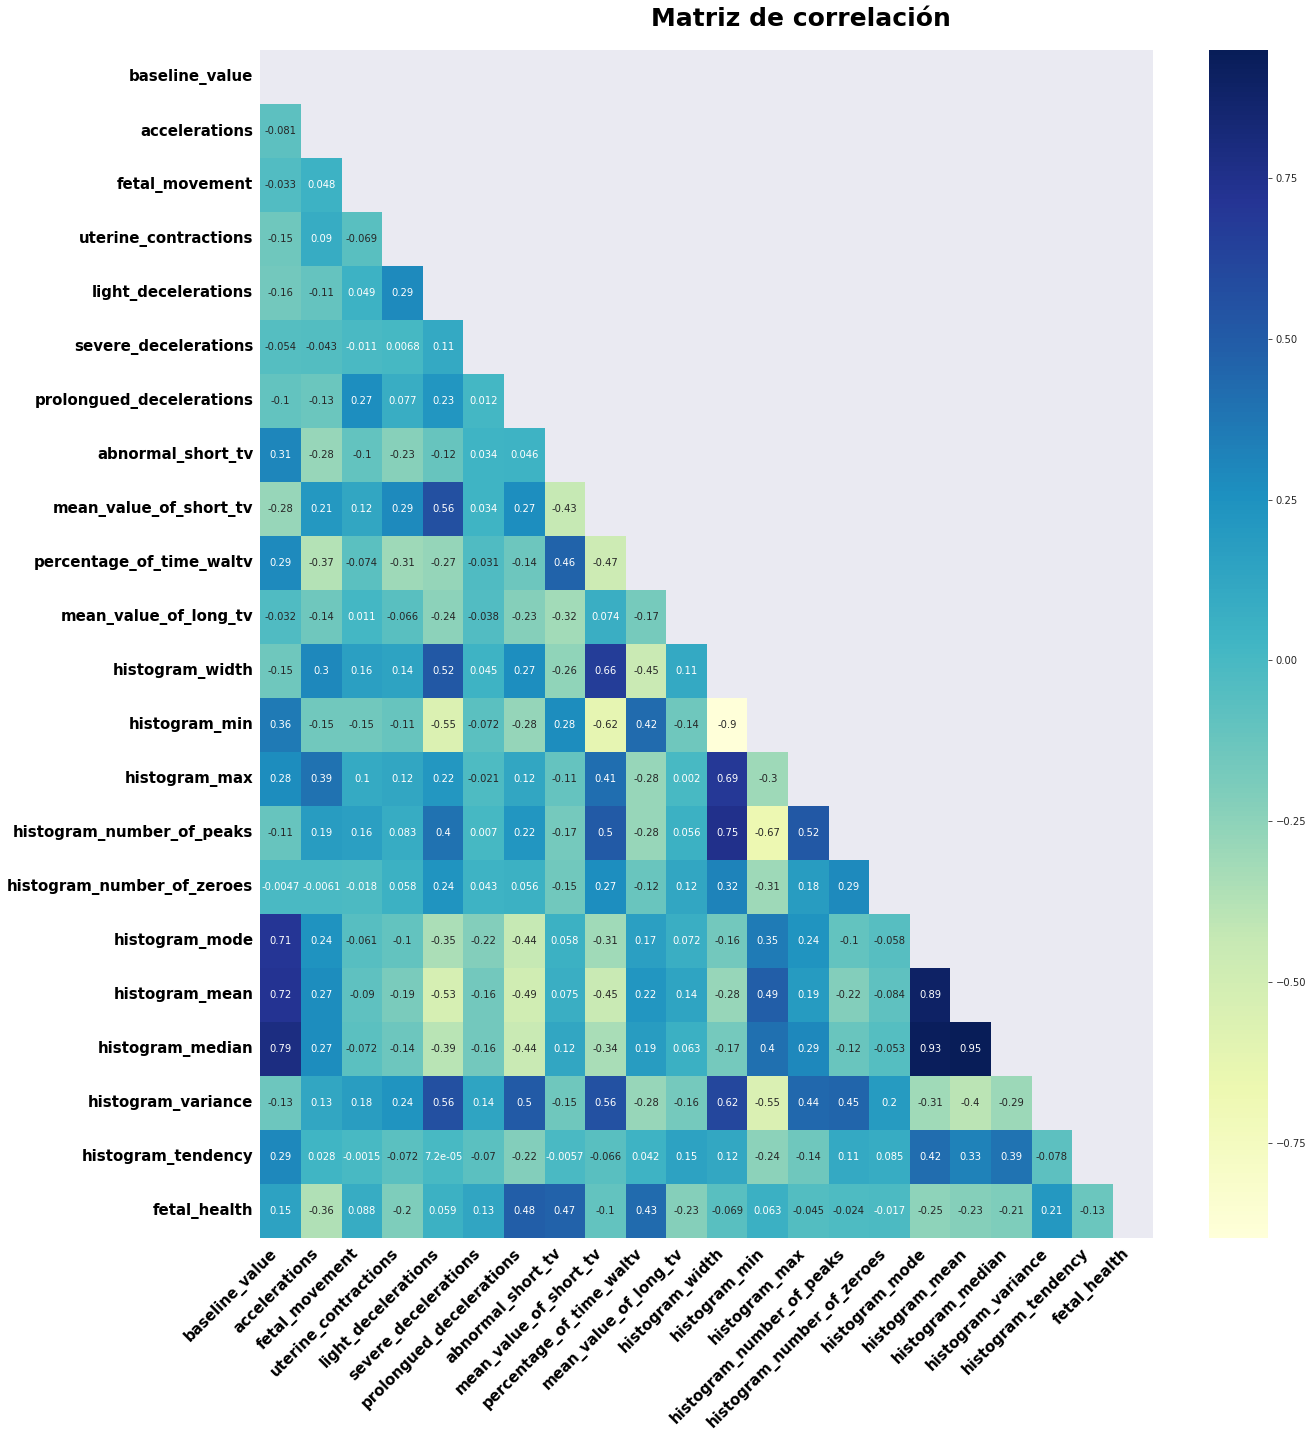

In [15]:
# Realiza una matriz de correlación

clases_inverso = {'Normal': 1, 'Sospechoso': 2, 'Patológico': 3}

aux.fetal_health.replace(clases_inverso, inplace = True)
correlacion = aux.corr()

plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(correlacion, dtype = bool))
sns.heatmap(correlacion, annot = True, cmap = 'YlGnBu', mask=mask)
plt.yticks(ha = 'right', color = 'black', fontweight = 'bold', fontsize = 15)
plt.xticks(rotation = 45, ha = 'right', color = 'black', fontweight = 'bold', fontsize = 15)
plt.suptitle('Matriz de correlación', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.95)

#Preprocesamiento

##Variables de baja varianza

In [16]:
# Varianza de cada una de las variables

round(np.var(base.iloc[:, :-1]), 2)

baseline_value                  96.80
accelerations                    0.00
fetal_movement                   0.00
uterine_contractions             0.00
light_decelerations              0.00
severe_decelerations             0.00
prolongued_decelerations         0.00
abnormal_short_tv              295.45
mean_value_of_short_tv           0.78
percentage_of_time_waltv       338.29
mean_value_of_long_tv           31.66
histogram_width               1516.83
histogram_min                  873.40
histogram_max                  321.84
histogram_number_of_peaks        8.69
histogram_number_of_zeroes       0.50
histogram_mode                 268.22
histogram_mean                 243.05
histogram_median               209.18
histogram_variance             839.31
histogram_tendency               0.37
dtype: float64

In [17]:
# Da como resultado aquellas variables que estan por debajo de 0.25 de varianza

varianza = VarianceThreshold(threshold = 1)
varianza.fit(base.iloc[:, :-1])
columnas = [i for i in base.iloc[:, :-1].columns if i not in base.iloc[:, :-1].columns[varianza.get_support()]]
columnas

['accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'mean_value_of_short_tv',
 'histogram_number_of_zeroes',
 'histogram_tendency']

In [18]:
# Nueva base de datos sin las variables con baja varianza

base = base.drop(columnas, axis = 1)
print('La base de datos tiene', base.shape[0], 'filas y', base.shape[1], 'columnas')

La base de datos tiene 2126 filas y 13 columnas


##Sobremuestreo

In [19]:
# Conteo de las clases antes del sobremuestreo

ContarA = Counter(base.iloc[:, -1])
print('Antes del sobremuestreo:', ContarA)

Antes del sobremuestreo: Counter({1.0: 1655, 2.0: 295, 3.0: 176})


In [20]:
# Realizar sobremuestreo con la técnica SMOTEENN

copia_base = base.copy()
filas = base.shape[0]
smoteenn = SMOTEENN(sampling_strategy = 'not majority')
base_smoteenn = smoteenn.fit_resample(copia_base.iloc[:, :-1], copia_base.iloc[:, -1])
                                                             
base_sobremuestreo = base_smoteenn[0]
base_sobremuestreo['fetal_health'] = base_smoteenn[1]
                                                             
print('Se agregarón', base_sobremuestreo.shape[0] - filas, 'filas con respecto a las clases minoritarias')

Se agregarón 2418 filas con respecto a las clases minoritarias


In [21]:
# Conteo de clases después del sobremuestreo

ContarD = Counter(base_sobremuestreo.iloc[:, -1])
print('Después del sobremuestreo:', ContarD)

Después del sobremuestreo: Counter({3.0: 1612, 2.0: 1547, 1.0: 1385})


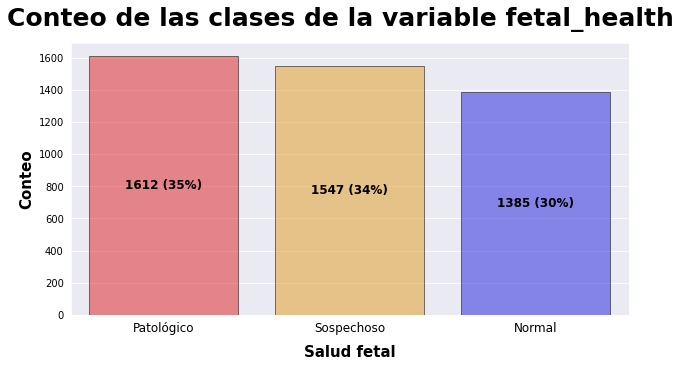

In [22]:
# Realiza un gráfico de conteo de las clases de la variable fetal_health

plt.figure(figsize = (10, 5))
colores = {1: 'blue', 2: 'orange', 3: 'red'}

a = sns.countplot(x = base_sobremuestreo['fetal_health'],
                  order = base_sobremuestreo['fetal_health'].value_counts(ascending = False).index, edgecolor = 'black',
                  palette = colores, alpha = 0.5)
valores_absolutos = base_sobremuestreo['fetal_health'].value_counts(ascending = False)
valores_relativos = base_sobremuestreo['fetal_health'].value_counts(ascending = False, normalize = True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(valores_absolutos, valores_relativos)]

a.bar_label(container = a.containers[0], labels = lbls, fontweight = 'bold',
            label_type = 'center',
            #padding = 10,
            color = 'black',
            fontsize = 12)
a.set_xticklabels(['Patológico', 'Sospechoso', 'Normal'])

plt.suptitle('Conteo de las clases de la variable fetal_health', fontweight = 'bold', fontsize = 25, color = 'black')
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black')
plt.xlabel('Salud fetal', fontweight = 'bold', fontsize = 15, color = 'black', labelpad = 10)
plt.ylabel('Conteo', fontweight = 'bold', fontsize = 15, color = 'black')
plt.subplots_adjust(top = 0.88)

##Selección de variables más importantes

###Base de datos desequilibrada

Text(0, 0.5, 'Variables')

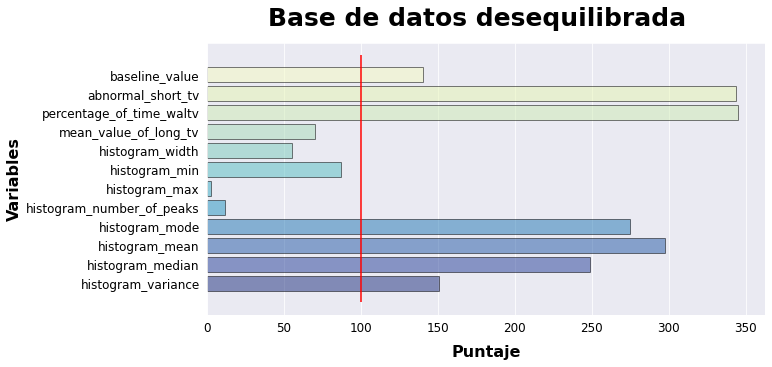

In [23]:
# Realiza la selección de variables de la base desequilibrada
#https://enjoymachinelearning.com/blog/feature-selection-selectkbest-sklearn/

x = base.iloc[:, :-1] 
y = base.iloc[:, -1]

seleccion = SelectKBest(f_classif, k = 'all')
seleccion.fit(x,y)

puntajes = pd.DataFrame(seleccion.scores_)
columnas = pd.DataFrame(x.columns)
variables_puntaje = pd.concat([columnas, puntajes], axis = 1)
variables_puntaje.columns = ['Variables', 'Puntaje'] 

plt.subplots(figsize = (10, 5))
sns.barplot(data = variables_puntaje, x = 'Puntaje', y = 'Variables', edgecolor = 'black',
            saturation = 1, orient = 'h', alpha = 0.5, palette = 'YlGnBu')
plt.vlines(x = 100, ymin = -1, ymax = 12, color = 'red')
plt.suptitle('Base de datos desequilibrada', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.88)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.xlabel('Puntaje', fontweight = 'bold', fontsize = 16, color = 'black', labelpad = 10)
plt.ylabel('Variables', fontweight = 'bold', fontsize = 16, color = 'black')


In [24]:
# Crea la nueva base de datos con las variables seleccionadas de la base desequilibrada

seleccionarva = variables_puntaje[variables_puntaje['Puntaje'] >= 100] 
seleccionarva = list(seleccionarva['Variables']) 
seleccionarva.append('fetal_health') 

base_nueva = base[seleccionarva]

print('La base de datos desequilibrada nueva tiene', base_nueva.shape[0], 'filas y', base_nueva.shape[1], 'columnas')

La base de datos desequilibrada nueva tiene 2126 filas y 8 columnas


###Base de datos equilibrada

Text(0, 0.5, 'Variables')

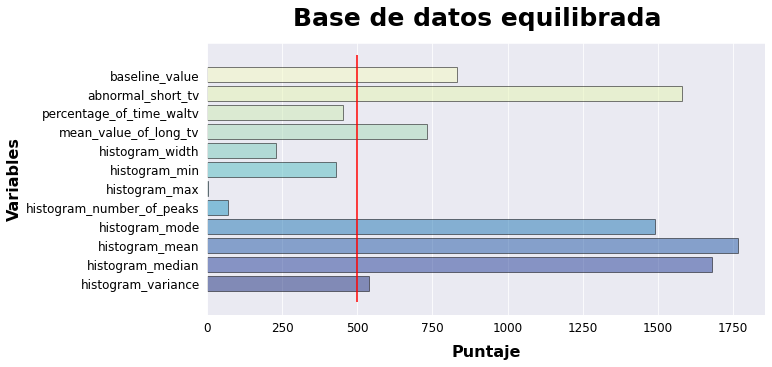

In [25]:
# Realiza la selección de variables de la base equilibrada

x = base_sobremuestreo.iloc[:, :-1] 
y = base_sobremuestreo.iloc[:, -1]

seleccion = SelectKBest(f_classif, k = 'all')
seleccion.fit(x,y)

puntajes = pd.DataFrame(seleccion.scores_)
columnas = pd.DataFrame(x.columns)
variables_puntaje = pd.concat([columnas, puntajes], axis = 1)
variables_puntaje.columns = ['Variables', 'Puntaje'] 

plt.subplots(figsize = (10, 5))
sns.barplot(data = variables_puntaje, x = 'Puntaje', y = 'Variables', edgecolor = 'black',
            saturation = 1, orient = 'h', alpha = 0.5, palette = 'YlGnBu')
plt.vlines(x = 500, ymin = -1, ymax = 12, color = 'red')
plt.suptitle('Base de datos equilibrada', fontweight = 'bold', fontsize = 25, color = 'black')
plt.subplots_adjust(top = 0.88)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.xlabel('Puntaje', fontweight = 'bold', fontsize = 16, color = 'black', labelpad = 10)
plt.ylabel('Variables', fontweight = 'bold', fontsize = 16, color = 'black')

In [26]:
# Crea la nueva base de datos con las variables seleccionadas de la base equilibrada

seleccionarva = variables_puntaje[variables_puntaje['Puntaje'] >= 500] 
seleccionarva = list(seleccionarva['Variables']) 
seleccionarva.append('fetal_health') 

base_nueva_sobremuestreo = base_sobremuestreo[seleccionarva]

print('La base de datos equilibrada nueva tiene', base_nueva_sobremuestreo.shape[0], 'filas y',
      base_nueva_sobremuestreo.shape[1], 'columnas')

La base de datos equilibrada nueva tiene 4544 filas y 8 columnas


#Aprendizaje Supervisado

##Base de datos desequilibrada

###División del conjunto de entrenamiento y prueba

In [27]:
# Separa la base desequilibrada en entrenamiento y prueba

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(base_nueva.iloc[:, :-1], base_nueva.iloc[:, -1],
                                                            test_size = 0.3, shuffle = True)
print('La base de datos desequilibrada de entrenamiento tiene', x_entrena.shape[0], 'filas y', x_entrena.shape[1], 'columnas')
print('La base de datos desequilibrada de prueba tiene', x_prueba.shape[0], 'filas y', x_prueba.shape[1], 'columnas')

La base de datos desequilibrada de entrenamiento tiene 1488 filas y 7 columnas
La base de datos desequilibrada de prueba tiene 638 filas y 7 columnas


###Estandarización de los conjuntos de datos

In [28]:
# Estandariza la base desequilibrada

estandarizar = StandardScaler()
x_entrena = estandarizar.fit_transform(x_entrena) 
x_prueba = estandarizar.transform(x_prueba)

###Modelos SVM

In [29]:
# Función para crear un modelo SVM con 4 tipos de kernels

kernels = ['Polinomial', 'RBF', 'Sigmoide', 'Lineal']

def ClasificadorSVC(kernel):
  if kernel == 0:
    # Kernel Polinomial
    return SVC(kernel = 'poly', gamma = 'scale')
  elif kernel == 1:
    # Kernel Función de Base Radial
    return SVC(kernel = 'rbf', gamma = 'scale')
  elif kernel == 2:
    # Kernel Sigmoide
    return SVC(kernel = 'sigmoid', gamma = 'scale')
  elif kernel == 3:
    # Kernel Lineal
    return SVC(kernel = 'linear', gamma = 'scale')

###Entrenamiento, prueba del modelo y reporte de resultados

In [30]:
# Función para crear una matriz de confusión

#colores = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#008B8B', '#E0FFFF', '#FFFFFF'])
#YlGnBu

etiquetas = ['Normal', 'Sospechoso', 'Patológico']

def matriz_confusion(y_prueba, y_predicha):
  conf_mat = confusion_matrix(y_prueba, y_predicha)
  fig, ax = plt.subplots(figsize = (8,6))
  sns.heatmap(conf_mat, annot = True, fmt = 'd',
              xticklabels = etiquetas,
              yticklabels = etiquetas, cmap = 'Blues',
              linecolor = 'black')
  plt.title('Matriz de Confusión', fontweight = 'bold')
  plt.xlabel('Valores predichos', fontweight = 'bold')
  plt.ylabel('Valores reales', fontweight = 'bold')
  plt.show()

Evaluación del kernel: Polinomial
Exactitud en la base de datos desequilibrada: 87.5018%
              precision    recall  f1-score   support

      Normal       0.90      0.98      0.94       504
  Sospechoso       0.64      0.36      0.46        81
  Patológico       0.97      0.74      0.84        53

    accuracy                           0.88       638
   macro avg       0.84      0.69      0.75       638
weighted avg       0.87      0.88      0.87       638



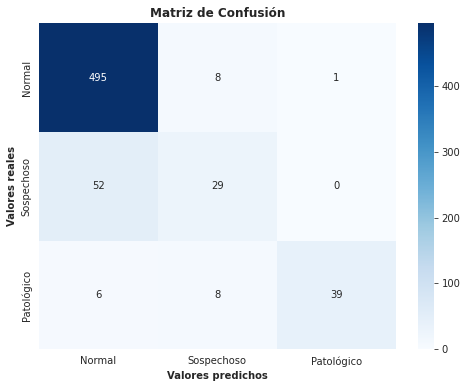



Evaluación del kernel: RBF
Exactitud en la base de datos desequilibrada: 88.913%
              precision    recall  f1-score   support

      Normal       0.91      0.97      0.94       504
  Sospechoso       0.66      0.48      0.56        81
  Patológico       0.93      0.72      0.81        53

    accuracy                           0.89       638
   macro avg       0.83      0.72      0.77       638
weighted avg       0.88      0.89      0.88       638



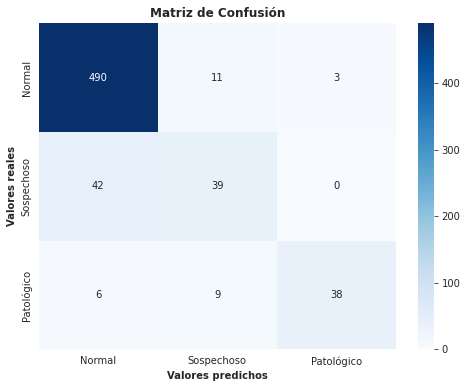



Evaluación del kernel: Sigmoide
Exactitud en la base de datos desequilibrada: 73.2505%
              precision    recall  f1-score   support

      Normal       0.82      0.89      0.85       504
  Sospechoso       0.34      0.19      0.24        81
  Patológico       0.21      0.19      0.20        53

    accuracy                           0.74       638
   macro avg       0.46      0.42      0.43       638
weighted avg       0.71      0.74      0.72       638



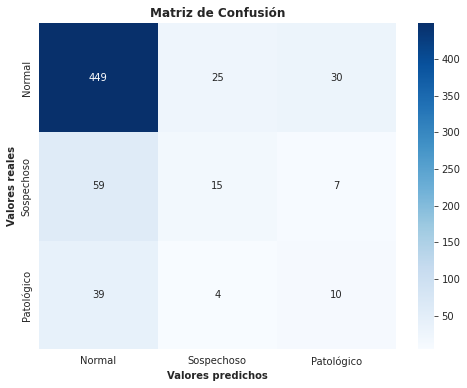



Evaluación del kernel: Lineal
Exactitud en la base de datos desequilibrada: 86.7608%
              precision    recall  f1-score   support

      Normal       0.91      0.98      0.94       504
  Sospechoso       0.69      0.44      0.54        81
  Patológico       0.91      0.77      0.84        53

    accuracy                           0.89       638
   macro avg       0.84      0.73      0.77       638
weighted avg       0.88      0.89      0.88       638



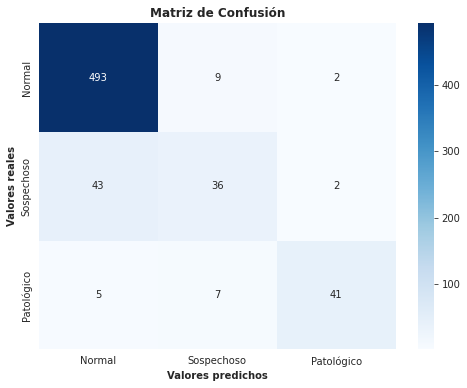

In [31]:
# Evalua el modelo SVM con los diferentes kernels

for i in range(len(kernels)):
  svc = ClasificadorSVC(i)
  svc.fit(x_entrena, y_entrena)
  y_predicha = svc.predict(x_prueba)
  print('Evaluación del kernel:', kernels[i])
  print('Exactitud en la base de datos desequilibrada:', str(round((cross_val_score(svc, x_entrena, y_entrena, cv = 10)).mean()*100, 4)) + '%')
  print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
  matriz_confusion(y_prueba, y_predicha)
  print('\n')

###Hiperparámetros: Entrenamiento, prueba del modelo y reporte de resultados

In [32]:
# Selección de los hiperparámetros de manera aleatoria

#https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-09_RandomizedSearchCV.html
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

#scipy.stats.uniform(scale = 1).rvs(size = 1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=10)

parametros = [
    # Polinomial
    {
        'kernel': ['poly'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'degree': list(np.arange(1, 11, 1)),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    # RBF
    {
        'kernel': ['rbf'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    #Sigmoide
    {
        'kernel': ['sigmoid'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    # Lineal
    {
        'kernel': ['linear'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    }
]

In [33]:
# Entrenamiento del modelo

hiperparametros = RandomizedSearchCV(estimator = SVC(),
                                     param_distributions = parametros,
                                     n_iter = 10,
                                     cv = 10,
                                     scoring= 'accuracy',
                                     refit = True,
                                     #n_jobs = -1,
                                     return_train_score = True,
                                     verbose = 3)

start = time()
hiperparametros.fit(x_entrena, y_entrena)
print('\n')
print('Le tomó %.2f segundos para encontrar los parámetros'%(time() - start))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.998, test=0.826) total time=  29.9s
[CV 2/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.998, test=0.893) total time=  28.6s
[CV 3/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.999, test=0.819) total time=  22.2s
[CV 4/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.999, test=0.846) total time=  24.6s
[CV 5/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.999, test=0.899) total time=  32.8s
[CV 6/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.999, test=0.839) total time=  27.6s
[CV 7/10] END C=36.771200664673856, degree=6, gamma=0.9918941721228949, kernel=poly;, score=(train=0.998, test=0.87

In [34]:
# Resultados del entrenamiento

print('Los mejores parámetros para la base de datos desequilibrada:', hiperparametros.best_params_)
print('\n')
print('Índice que le corresponde:', hiperparametros.best_index_)
print('\n')
print('Mejor estimador:', hiperparametros.best_estimator_)
print('\n')
print('Mejor exactitud:', str(round(hiperparametros.best_score_*100, 4)) + '%')

Los mejores parámetros para la base de datos desequilibrada: {'kernel': 'poly', 'gamma': 0.5428930249845851, 'degree': 4, 'C': 42.271813519188015}


Índice que le corresponde: 5


Mejor estimador: SVC(C=42.271813519188015, degree=4, gamma=0.5428930249845851, kernel='poly')


Mejor exactitud: 89.5198%


              precision    recall  f1-score   support

      Normal       0.92      0.95      0.93       504
  Sospechoso       0.64      0.52      0.57        81
  Patológico       0.83      0.74      0.78        53

    accuracy                           0.88       638
   macro avg       0.79      0.74      0.76       638
weighted avg       0.87      0.88      0.88       638



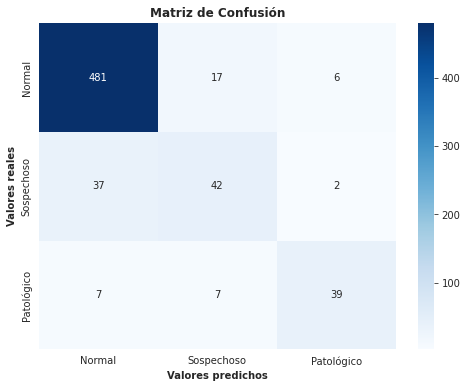

In [35]:
# Evaluación del modelo

y_predicha = hiperparametros.predict(x_prueba)
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

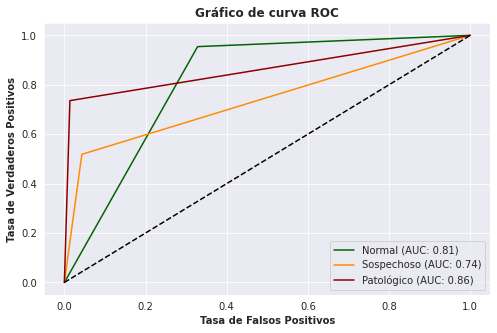

Área bajo la curva: 91.0658%



In [36]:
# Curva ROC AUC

etiquetas_clases= ['Normal', 'Sospechoso', 'Patológico']
colores = ['darkgreen', 'darkorange', 'darkred']

# Función para calcular el ROC AUC multiclase (con gráfico)
def multiclass_roc_auc_score(y_prueba, y_predicha, average = 'micro'):
    lb = LabelBinarizer()
    lb.fit(y_prueba)
    y_prueba = lb.transform(y_prueba)
    y_predicha = lb.transform(y_predicha)

    plt.subplots(1,1, figsize = (8, 5))
    for (idx, c_label) in enumerate(etiquetas_clases):
        fpr, tpr, thresholds = roc_curve(y_prueba[:, idx].astype(int), y_predicha[:,idx])
        plt.plot(fpr, tpr, label = '%s (AUC: %0.2f)' % (c_label, auc(fpr, tpr)), color = colores[idx])
    plt.plot(fpr, fpr, linestyle = '--', color = 'black')
    plt.legend()
    plt.title('Gráfico de curva ROC', fontweight = 'bold')
    plt.xlabel('Tasa de Falsos Positivos', fontweight = 'bold')
    plt.ylabel('Tasa de Verdaderos Positivos', fontweight = 'bold')
    plt.show()
    return roc_auc_score(y_prueba, y_predicha, average = average)

print(f'Área bajo la curva: {multiclass_roc_auc_score(y_prueba, y_predicha)*100:.4f}%\n')



In [37]:
# Tabla de resultados de hiperparámetros

tabla = pd.DataFrame(hiperparametros.cv_results_).head(3)
tabla

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,27.108901,3.171396,0.002560,0.000447,poly,0.991894,6,36.771201,"{'kernel': 'poly', 'gamma': 0.9918941721228949...",0.825503,...,0.998506,0.998506,0.998506,0.999253,0.997760,0.999253,0.998507,0.997761,0.998357,0.000559
1,0.647053,0.193288,0.002819,0.000607,poly,0.542893,5,0.340342,"{'kernel': 'poly', 'gamma': 0.5428930249845851...",0.892617,...,0.953697,0.950709,0.948469,0.949963,0.949216,0.952203,0.947761,0.947761,0.949896,0.002142
2,11.861559,2.690081,0.004170,0.002294,poly,0.897071,10,91.697605,"{'kernel': 'poly', 'gamma': 0.8970711994340717...",0.872483,...,0.999253,0.999253,0.999253,1.000000,0.999253,1.000000,0.999254,0.998507,0.999253,0.000472


##Base de datos equilibrada

###División del conjunto de entrenamiento y prueba

In [38]:
# Separa la base desequilibrada en entrenamiento y prueba

x_entrena, x_prueba, y_entrena, y_prueba = train_test_split(base_nueva_sobremuestreo.iloc[:, :-1], base_nueva_sobremuestreo.iloc[:, -1],
                                                            test_size = 0.3, shuffle = True)
print('La base de datos desequilibrada de entrenamiento tiene', x_entrena.shape[0], 'filas y', x_entrena.shape[1], 'columnas')
print('La base de datos desequilibrada de prueba tiene', x_prueba.shape[0], 'filas y', x_prueba.shape[1], 'columnas')

La base de datos desequilibrada de entrenamiento tiene 3180 filas y 7 columnas
La base de datos desequilibrada de prueba tiene 1364 filas y 7 columnas


###Estandarización de los conjuntos de datos

In [39]:
# Estandariza la base desequilibrada

estandarizar = StandardScaler()
x_entrena = estandarizar.fit_transform(x_entrena) 
x_prueba = estandarizar.transform(x_prueba)

###Modelos SVM

In [40]:
# Función para crear un modelo SVM con 4 tipos de kernels

kernels = ['Polinomial', 'RBF', 'Sigmoide', 'Lineal']

def ClasificadorSVC(kernel):
  if kernel == 0:
    # Kernel Polinomial
    return SVC(kernel = 'poly', gamma = 'scale')
  elif kernel == 1:
    # Kernel Función de Base Radial
    return SVC(kernel = 'rbf', gamma = 'scale')
  elif kernel == 2:
    # Kernel Sigmoide
    return SVC(kernel = 'sigmoid', gamma = 'scale')
  elif kernel == 3:
    # Kernel Lineal
    return SVC(kernel = 'linear', gamma = 'scale')

###Entrenamiento, prueba del modelo y reporte de resultados

In [41]:
# Función para crear una matriz de confusión

#colores = matplotlib.colors.LinearSegmentedColormap.from_list('custom', ['#008B8B', '#E0FFFF', '#FFFFFF'])
#YlGnBu

etiquetas = ['Normal', 'Sospechoso', 'Patológico']

def matriz_confusion(y_prueba, y_predicha):
  conf_mat = confusion_matrix(y_prueba, y_predicha)
  fig, ax = plt.subplots(figsize = (8,6))
  sns.heatmap(conf_mat, annot = True, fmt = 'd',
              xticklabels = etiquetas,
              yticklabels = etiquetas, cmap = 'Blues',
              linecolor = 'black')
  plt.title('Matriz de Confusión', fontweight = 'bold')
  plt.xlabel('Valores predichos', fontweight = 'bold')
  plt.ylabel('Valores reales', fontweight = 'bold')
  plt.show()

Evaluación del kernel: Polinomial
Exactitud en la base de datos desequilibrada: 84.6541%
              precision    recall  f1-score   support

      Normal       0.96      0.76      0.85       417
  Sospechoso       0.73      0.94      0.82       466
  Patológico       0.94      0.85      0.89       481

    accuracy                           0.85      1364
   macro avg       0.88      0.85      0.85      1364
weighted avg       0.87      0.85      0.85      1364



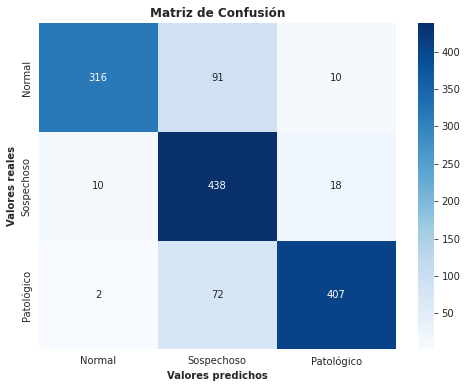



Evaluación del kernel: RBF
Exactitud en la base de datos desequilibrada: 89.8742%
              precision    recall  f1-score   support

      Normal       0.96      0.86      0.91       417
  Sospechoso       0.87      0.89      0.88       466
  Patológico       0.91      0.96      0.93       481

    accuracy                           0.91      1364
   macro avg       0.91      0.91      0.91      1364
weighted avg       0.91      0.91      0.91      1364



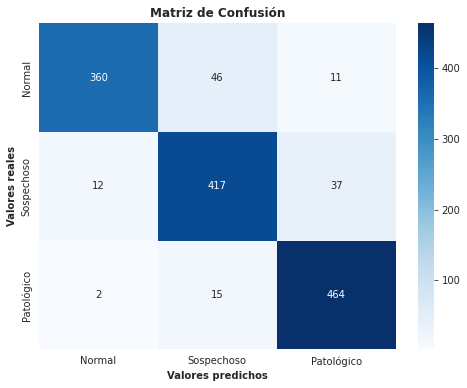



Evaluación del kernel: Sigmoide
Exactitud en la base de datos desequilibrada: 67.5786%
              precision    recall  f1-score   support

      Normal       0.73      0.60      0.66       417
  Sospechoso       0.61      0.62      0.62       466
  Patológico       0.70      0.80      0.74       481

    accuracy                           0.68      1364
   macro avg       0.68      0.67      0.67      1364
weighted avg       0.68      0.68      0.67      1364



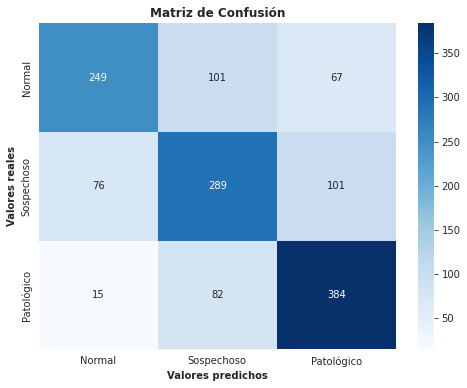



Evaluación del kernel: Lineal
Exactitud en la base de datos desequilibrada: 85.0943%
              precision    recall  f1-score   support

      Normal       0.91      0.80      0.85       417
  Sospechoso       0.80      0.82      0.81       466
  Patológico       0.85      0.92      0.88       481

    accuracy                           0.85      1364
   macro avg       0.85      0.85      0.85      1364
weighted avg       0.85      0.85      0.85      1364



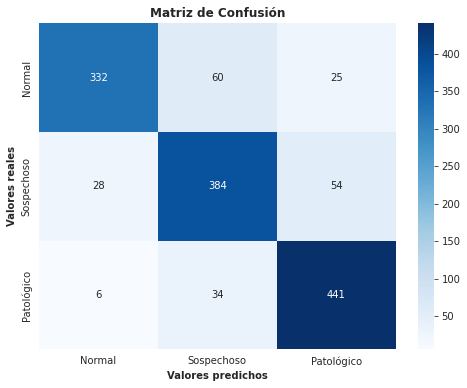

In [42]:
# Evalua el modelo SVM con los diferentes kernels

for i in range(len(kernels)):
  svc = ClasificadorSVC(i)
  svc.fit(x_entrena, y_entrena)
  y_predicha = svc.predict(x_prueba)
  print('Evaluación del kernel:', kernels[i])
  print('Exactitud en la base de datos desequilibrada:', str(round((cross_val_score(svc, x_entrena, y_entrena, cv = 10)).mean()*100, 4)) + '%')
  print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
  matriz_confusion(y_prueba, y_predicha)
  print('\n')

###Hiperparámetros: Entrenamiento, prueba del modelo y reporte de resultados

In [43]:
# Selección de los hiperparámetros de manera aleatoria

#https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-09_RandomizedSearchCV.html
#https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

#scipy.stats.uniform(scale = 1).rvs(size = 1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=1000)
#scipy.stats.randint.rvs(low = 1, high = 100, size=10)

parametros = [
    # Polinomial
    {
        'kernel': ['poly'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'degree': list(np.arange(1, 11, 1)),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    # RBF
    {
        'kernel': ['rbf'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    #Sigmoide
    {
        'kernel': ['sigmoid'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    },

    # Lineal
    {
        'kernel': ['linear'],
        'gamma': scipy.stats.uniform(scale = 1).rvs(size = 5),
        'C': scipy.stats.uniform(scale = 100).rvs(size = 1000)
    }
]

In [44]:
# Entrenamiento del modelo

hiperparametros = RandomizedSearchCV(estimator = SVC(),
                                     param_distributions = parametros,
                                     n_iter = 10,
                                     cv = 10,
                                     scoring= 'accuracy',
                                     refit = True,
                                     #n_jobs = -1,
                                     return_train_score = True,
                                     verbose = 3)

start = time()
hiperparametros.fit(x_entrena, y_entrena)
print('\n')
print('Le tomó %.2f segundos para encontrar los parámetros'%(time() - start))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.859, test=0.871) total time=   1.0s
[CV 2/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.857, test=0.865) total time=   1.1s
[CV 3/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.861, test=0.855) total time=   1.0s
[CV 4/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.859, test=0.865) total time=   0.6s
[CV 5/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.861, test=0.868) total time=   0.6s
[CV 6/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.855, test=0.884) total time=   0.6s
[CV 7/10] END C=33.52598891044425, gamma=0.5095271465122824, kernel=linear;, score=(train=0.859, test=0.846) total time=   0.6s
[CV 8/10] END C=33.52598891044425, gamma=

In [45]:
# Resultados del entrenamiento

print('Los mejores parámetros para la base de datos desequilibrada:', hiperparametros.best_params_)
print('\n')
print('Índice que le corresponde:', hiperparametros.best_index_)
print('\n')
print('Mejor estimador:', hiperparametros.best_estimator_)
print('\n')
print('Mejor exactitud:', str(round(hiperparametros.best_score_*100, 4)) + '%')

Los mejores parámetros para la base de datos desequilibrada: {'kernel': 'rbf', 'gamma': 0.9597376405705977, 'C': 74.9924817275465}


Índice que le corresponde: 2


Mejor estimador: SVC(C=74.9924817275465, gamma=0.9597376405705977)


Mejor exactitud: 96.5094%


              precision    recall  f1-score   support

      Normal       0.97      0.96      0.96       417
  Sospechoso       0.95      0.96      0.95       466
  Patológico       0.98      0.98      0.98       481

    accuracy                           0.97      1364
   macro avg       0.97      0.97      0.97      1364
weighted avg       0.97      0.97      0.97      1364



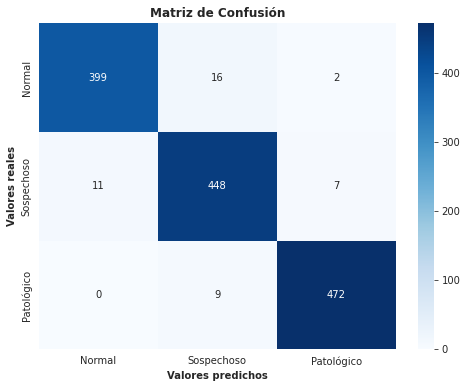

In [46]:
# Evaluación del modelo

y_predicha = hiperparametros.predict(x_prueba)
print(classification_report(y_prueba, y_predicha, target_names = etiquetas))
matriz_confusion(y_prueba, y_predicha)

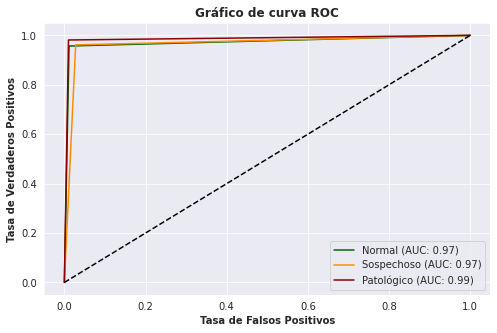

Área bajo la curva: 97.5257%



In [47]:
# Curva ROC AUC
etiquetas_clases= ['Normal', 'Sospechoso', 'Patológico']
colores = ['darkgreen', 'darkorange', 'darkred']

# Función para calcular el ROC AUC multiclase (con gráfico)
def multiclass_roc_auc_score(y_prueba, y_predicha, average = 'micro'):
    lb = LabelBinarizer()
    lb.fit(y_prueba)
    y_prueba = lb.transform(y_prueba)
    y_predicha = lb.transform(y_predicha)

    plt.subplots(1,1, figsize = (8, 5))
    for (idx, c_label) in enumerate(etiquetas_clases):
        fpr, tpr, thresholds = roc_curve(y_prueba[:, idx].astype(int), y_predicha[:,idx])
        plt.plot(fpr, tpr, label = '%s (AUC: %0.2f)' % (c_label, auc(fpr, tpr)), color = colores[idx])
    plt.plot(fpr, fpr, linestyle = '--', color = 'black')
    plt.legend()
    plt.title('Gráfico de curva ROC', fontweight = 'bold')
    plt.xlabel('Tasa de Falsos Positivos', fontweight = 'bold')
    plt.ylabel('Tasa de Verdaderos Positivos', fontweight = 'bold')
    plt.show()
    return roc_auc_score(y_prueba, y_predicha, average = average)

print(f'Área bajo la curva: {multiclass_roc_auc_score(y_prueba, y_predicha)*100:.4f}%\n')



In [48]:
# Tabla de resultados de hiperparámetros

tabla = pd.DataFrame(hiperparametros.cv_results_).head(3)
tabla

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,param_degree,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.707428,0.219173,0.012472,0.003335,linear,0.509527,33.525989,NaN,"{'kernel': 'linear', 'gamma': 0.50952714651228...",0.871069,...,0.860587,0.859189,0.860587,0.855346,0.859189,0.862683,0.85884,0.860238,0.859259,0.001950
1,0.557718,0.101086,0.011555,0.003583,linear,0.3944,29.207026,NaN,"{'kernel': 'linear', 'gamma': 0.39439991343301...",0.871069,...,0.860587,0.859189,0.860587,0.855346,0.859189,0.862683,0.85884,0.859888,0.859259,0.001861
2,0.231753,0.043995,0.023382,0.006791,rbf,0.959738,74.992482,NaN,"{'kernel': 'rbf', 'gamma': 0.9597376405705977,...",0.962264,...,0.988470,0.987771,0.987771,0.987072,0.988120,0.985325,0.98812,0.987771,0.987282,0.001062
